<a href="https://colab.research.google.com/github/dvsmihir1/ML-Lab/blob/main/ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
file='Lab Session Data.xlsx'
df=pd.ExcelFile(file)
purchase_data = pd.read_excel(file, sheet_name='Purchase data')
A = purchase_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
C = purchase_data['Payment (Rs)'].values.reshape(-1, 1)
dimension=A.shape[1]
dimensionc=C.shape[1]
noofvectors=A.shape[0]
noofvectorsc=C.shape[0]
rankA=np.linalg.matrix_rank(A)
rankC=np.linalg.matrix_rank(C)
pseudoinverse=np.linalg.pinv(A)
costperproduct=np.dot(pseudoinverse,C)
print(costperproduct)
print(pseudoinverse)
print(rankA)
print(rankC)
print(dimension)
print(dimensionc)
print(noofvectors)
print(noofvectorsc)

[[ 1.]
 [55.]
 [18.]]
[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]
3
1
3
1
10
10


Q2)

In [ ]:
pseudo_inverse_A = np.linalg.pinv(A)
model_vector_X = np.dot(pseudo_inverse_A, C)
print(model_vector_X)
print(pseudo_inverse_A)

[[ 1.]
 [55.]
 [18.]]
[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the Excel file (make sure to upload your file in Colab and get the correct path)
file_path = 'Lab Session Data.xlsx'

# Load the 'Purchase data' sheet
purchase_data = pd.read_excel(file_path, sheet_name='Purchase data')

# Mark customers as 'RICH' or 'POOR'
purchase_data['Status'] = ['RICH' if payment > 200 else 'POOR' for payment in purchase_data['Payment (Rs)']]

# Extract features (Candies, Mangoes, Milk Packets) and target (Status)
X = purchase_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = purchase_data['Status']

# Convert target variable to binary format for classification
y_binary = np.where(y == 'RICH', 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Develop a Logistic Regression classifier model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict the status on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['POOR', 'RICH'])

# Print the results
print("Classifier Accuracy:", accuracy)
print("Classification Report:\n", report)

# Show the marked DataFrame
print("\nPurchase Data with Status:")
print(purchase_data)


Classifier Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

        POOR       0.50      1.00      0.67         1
        RICH       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Purchase Data with Status:
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   
5      C_6           22             1                 5           167   
6      C_7           15             4                 2           271   
7      C_8  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Q4)

In [4]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Lab Session Data.xlsx'

# Load the 'IRCTC Stock Price' sheet
stock_data = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

# Convert 'Date' column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Calculate mean and variance of the Price data (column D)
price_mean = statistics.mean(stock_data['Price'])
price_variance = statistics.variance(stock_data['Price'])

print("Mean of Price Data:", price_mean)
print("Variance of Price Data:", price_variance)

Mean of Price Data: 1560.663453815261
Variance of Price Data: 58732.365352539186


In [5]:
wednesday_data = stock_data[stock_data['Date'].dt.weekday == 2]
wednesday_mean = statistics.mean(wednesday_data['Price'])

print("\nMean of Price Data on Wednesdays:", wednesday_mean)
print("Comparison with Population Mean:", wednesday_mean - price_mean)


Mean of Price Data on Wednesdays: 1550.706
Comparison with Population Mean: -9.957453815261033


In [6]:
april_data = stock_data[stock_data['Date'].dt.month == 4]
april_mean = statistics.mean(april_data['Price'])

print("\nMean of Price Data in April:", april_mean)
print("Comparison with Population Mean:", april_mean - price_mean)



Mean of Price Data in April: 1698.9526315789474
Comparison with Population Mean: 138.28917776368644


In [8]:
loss_prob = len(stock_data[stock_data['Chg%'] < 0]) / len(stock_data)
print("\nProbability of Making a Loss:", loss_prob)


Probability of Making a Loss: 0.4979919678714859


In [9]:
profit_wednesday_prob = len(wednesday_data[wednesday_data['Chg%'] > 0]) / len(wednesday_data)
print("\nProbability of Making a Profit on Wednesday:", profit_wednesday_prob)


Probability of Making a Profit on Wednesday: 0.42


In [10]:
conditional_profit_wednesday_prob = profit_wednesday_prob
print("\nConditional Probability of Making a Profit Given It's Wednesday:", conditional_profit_wednesday_prob)


Conditional Probability of Making a Profit Given It's Wednesday: 0.42


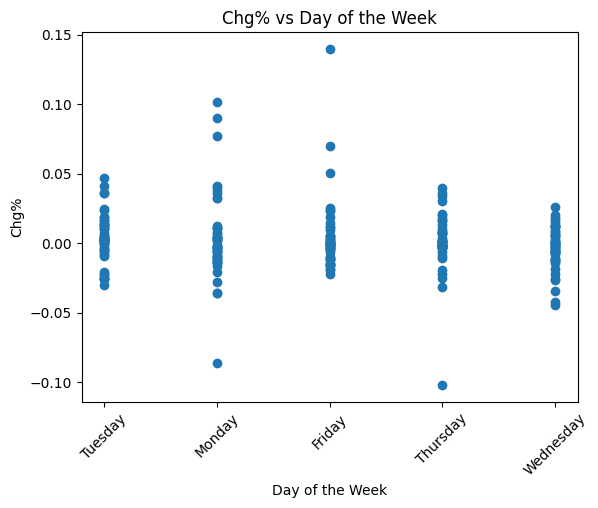

In [11]:
stock_data['DayOfWeek'] = stock_data['Date'].dt.day_name()
plt.scatter(stock_data['DayOfWeek'], stock_data['Chg%'])
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('Chg% vs Day of the Week')
plt.xticks(rotation=45)
plt.show()

Q5)

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import zscore

# Load the Excel file
file_path = 'Lab Session Data.xlsx'

# Load the 'thyroid0387_UCI' sheet
thyroid_data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

# Display the first few rows of the data to understand its structure
print(thyroid_data.head())

# Study each attribute and associated values
data_info = thyroid_data.info()
print(data_info)

# Identify the datatype (nominal, ordinal, etc.) for each attribute
attribute_types = thyroid_data.dtypes
print("\nData Types of Each Attribute:\n", attribute_types)

   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1            t  128   

In [14]:
categorical_columns = thyroid_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = thyroid_data[column].unique()
    print(f"\nUnique values in '{column}':\n{unique_values}")

# Handle categorical variables with Label Encoding for ordinal variables and One-Hot Encoding for nominal variables
# Assuming no ordinal columns for simplicity
label_encoded_columns = []
one_hot_encoded_columns = []

for column in categorical_columns:
    if column in ['ExampleOrdinalColumn']:  # Replace with actual ordinal column names if any
        le = LabelEncoder()
        thyroid_data[column] = le.fit_transform(thyroid_data[column])
        label_encoded_columns.append(column)
    else:
        one_hot_encoded_columns.append(column)

# One-Hot Encoding for nominal variables
thyroid_data = pd.get_dummies(thyroid_data, columns=one_hot_encoded_columns)


Unique values in 'sex':
['F' 'M' '?']

Unique values in 'on thyroxine':
['f' 't']

Unique values in 'query on thyroxine':
['f' 't']

Unique values in 'on antithyroid medication':
['f' 't']

Unique values in 'sick':
['f' 't']

Unique values in 'pregnant':
['f' 't']

Unique values in 'thyroid surgery':
['f' 't']

Unique values in 'I131 treatment':
['f' 't']

Unique values in 'query hypothyroid':
['t' 'f']

Unique values in 'query hyperthyroid':
['f' 't']

Unique values in 'lithium':
['f' 't']

Unique values in 'goitre':
['f' 't']

Unique values in 'tumor':
['f' 't']

Unique values in 'hypopituitary':
['f' 't']

Unique values in 'psych':
['f' 't']

Unique values in 'TSH measured':
['t' 'f']

Unique values in 'TSH':
[0.3 1.6 '?' 0.7 1.2 1.9 1 0.5 2.6 68 1.5 5.9 0.05 4 0.4 0.8 0.2 3
 9.599999 140 0.6 1.7 2.5 6.8 2.1 1.1 9.799999 3.7 0.1 0.35 90 1.3 2.7 2.9
 0.25 5.8 2 0.9 3.2 7.4 1.8 5 70 6.5 11.599999 4.2 88 2.2 53 16.5 8.4 4.1
 3.3 80 176 30 11 6 71 9.099999 10.7 4.9 3.4 1.83 4.6 1.4 14 

In [15]:
numeric_columns = thyroid_data.select_dtypes(include=[np.number]).columns
data_range = thyroid_data[numeric_columns].agg([np.min, np.max])
print("\nData Range for Numeric Variables:\n", data_range)



Data Range for Numeric Variables:
      Record ID    age
min  840801013      1
max  870119035  65526


<ipython-input-15-93b2c980f769>:2: FutureWarning: The provided callable <function min at 0x7aa551917520> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data_range = thyroid_data[numeric_columns].agg([np.min, np.max])
<ipython-input-15-93b2c980f769>:2: FutureWarning: The provided callable <function max at 0x7aa551917400> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data_range = thyroid_data[numeric_columns].agg([np.min, np.max])


In [16]:
# Study the presence of missing values in each attribute
missing_values = thyroid_data.isnull().sum()
print("\nMissing Values in Each Attribute:\n", missing_values)



Missing Values in Each Attribute:
 Record ID       0
age             0
sex_?           0
sex_F           0
sex_M           0
               ..
Condition_OI    0
Condition_P     0
Condition_Q     0
Condition_R     0
Condition_S     0
Length: 1395, dtype: int64


In [17]:
# Study the presence of outliers in data using z-score
outliers = thyroid_data[numeric_columns].apply(lambda x: np.abs(zscore(x)) > 3).sum()
print("\nPresence of Outliers in Each Numeric Attribute:\n", outliers)


Presence of Outliers in Each Numeric Attribute:
 Record ID    0
age          3
dtype: int64


<ipython-input-18-13c58be47faf>:2: FutureWarning: The provided callable <function mean at 0x7aa551917d00> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  numeric_stats = thyroid_data[numeric_columns].agg([np.mean, np.var, np.std])
<ipython-input-18-13c58be47faf>:2: FutureWarning: The provided callable <function var at 0x7aa551917f40> is currently using Series.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  numeric_stats = thyroid_data[numeric_columns].agg([np.mean, np.var, np.std])
<ipython-input-18-13c58be47faf>:2: FutureWarning: The provided callable <function std at 0x7aa551917e20> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  numeric_stats = thyroid_data[nume


Mean, Variance, and Standard Deviation for Numeric Variables:
          Record ID           age
mean  8.529473e+08  7.355582e+01
var   5.748625e+13  1.401801e+06
std   7.581969e+06  1.183977e+03


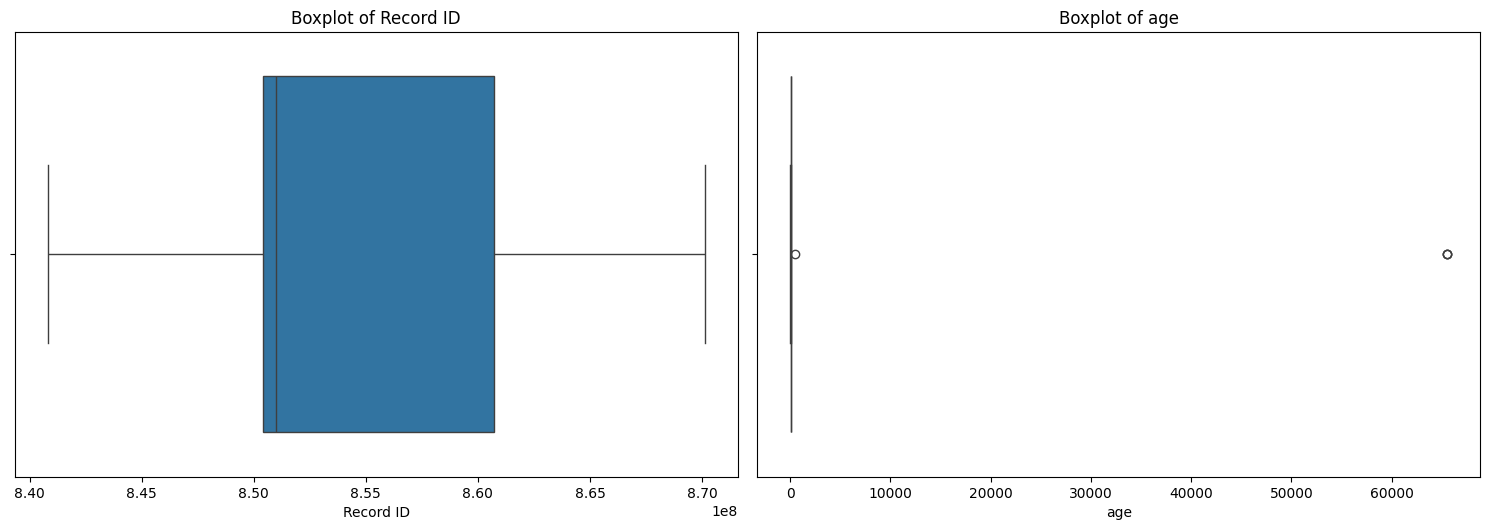

In [18]:
# For numeric variables, calculate the mean and variance (or standard deviation)
numeric_stats = thyroid_data[numeric_columns].agg([np.mean, np.var, np.std])
print("\nMean, Variance, and Standard Deviation for Numeric Variables:\n", numeric_stats)

# Plotting boxplots to visually inspect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns)//2 + 1, 2, i + 1)
    sns.boxplot(x=thyroid_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Q6)

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Load the Excel file
file_path = 'Lab Session Data.xlsx'

# Load the 'thyroid0387_UCI' sheet
thyroid_data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

# Convert 'Date' column to datetime if present (not required for this dataset)
# thyroid_data['Date'] = pd.to_datetime(thyroid_data['Date'])

# Identify the datatype (nominal, ordinal, etc.) for each attribute
data_types = thyroid_data.dtypes

# Identify numeric and categorical columns
numeric_columns = thyroid_data.select_dtypes(include=[np.number]).columns
categorical_columns = thyroid_data.select_dtypes(include=['object']).columns

# Identify columns with missing values
missing_values = thyroid_data.isnull().sum()
print("\nMissing Values in Each Attribute:\n", missing_values)

# Handle categorical variables with Mode
for column in categorical_columns:
    mode_value = thyroid_data[column].mode()[0]
    thyroid_data[column].fillna(mode_value, inplace=True)

# Identify outliers in numeric data using z-score
outliers = thyroid_data[numeric_columns].apply(lambda x: np.abs(zscore(x)) > 3)

# Handle numeric variables: use mean for columns without outliers, median for columns with outliers
for column in numeric_columns:
    if outliers[column].any():
        median_value = thyroid_data[column].median()
        thyroid_data[column].fillna(median_value, inplace=True)
    else:
        mean_value = thyroid_data[column].mean()
        thyroid_data[column].fillna(mean_value, inplace=True)

# Verify if all missing values are handled
missing_values_after = thyroid_data.isnull().sum()
print("\nMissing Values After Imputation:\n", missing_values_after)

# Display the imputed DataFrame
print("\nData After Imputation:")
print(thyroid_data.head())



Missing Values in Each Attribute:
 Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dty

Q7)

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the Excel file
file_path = 'Lab Session Data.xlsx'

# Load the 'thyroid0387_UCI' sheet
thyroid_data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

# Identify numeric and categorical columns
numeric_columns = thyroid_data.select_dtypes(include=[np.number]).columns
categorical_columns = thyroid_data.select_dtypes(include=['object']).columns



In [24]:
def has_outliers(data):
    z_scores = np.abs(zscore(data))
    return (z_scores > 3).any()


In [25]:
# Identify which columns need normalization (numeric columns)
columns_to_normalize = []
for column in numeric_columns:
    if has_outliers(thyroid_data[column]):
        print(f"Column {column} has outliers and will be standardized.")
    columns_to_normalize.append(column)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
thyroid_data[columns_to_normalize] = scaler.fit_transform(thyroid_data[columns_to_normalize])

# Apply Standardization for columns with outliers
# Note: Uncomment the lines below if standardization is required
# for column in columns_to_normalize:
#     if has_outliers(thyroid_data[column]):
#         std_scaler = StandardScaler()
#         thyroid_data[column] = std_scaler.fit_transform(thyroid_data[[column]])

# Display the normalized DataFrame
print("\nNormalized Data:")
print(thyroid_data.head())

Column age has outliers and will be standardized.

Normalized Data:
      Record ID       age sex on thyroxine query on thyroxine  \
0  0.000000e+00  0.000427   F            f                  f   
1  3.410871e-08  0.000427   F            f                  f   
2  9.891527e-07  0.000610   F            f                  f   
3  6.934301e-05  0.000534   F            f                  f   
4  6.937712e-05  0.000473   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI 